## CART (Classification and Regression Trees) Models

### Assignment
For today's assignment, you will create a Decision Tree Classifier for the dataset provided in the link below.

#### Requirements:

- Use the following dataset for your assignment today: [Link](https://drive.google.com/file/d/1p-0OicAm-AMFeCdaM9G53gai4Fqsqy1P/view)
- Create a Decision Tree Classifier model on your training data.
- Report your results on the test data.
- Report the precision, recall, and accuracy of your training and test sets.
- Try some of the preprocessing techniques learned last week where applicable to improve your model.
- Plot your Decision Tree at the end of your notebook showing the tree you created.
- Submit your notebook to the Learn platform when finished.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import tree

In [2]:
# loud in the dataset
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")

df_dh.head()
df_dh.shape

(200, 4)

In [3]:
# create new df
df_dh = pd.DataFrame (df_dh, columns = ['height','weight','type'])
df_dh.head()

,height,weight,type
0,27.0,71.0,dog
1,27.0,92.0,dog
2,32.0,47.0,dog
3,30.0,90.0,dog
4,28.0,91.0,dog


In [4]:
# repace values of type col 
df_dh["type"] = df_dh["type"].replace('dog',1) 
df_dh["type"] = df_dh["type"].replace('horse',0)
df_dh.head()

,height,weight,type
0,27.0,71.0,1
1,27.0,92.0,1
2,32.0,47.0,1
3,30.0,90.0,1
4,28.0,91.0,1


### Splitting the dataset 

In [5]:
# Save x and y data
x = df_dh.iloc[:, 0:2]
y = df_dh.iloc[:, -1]

In [6]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Entropy 

In [7]:
# Set max depth to 3 to make plotting the tree more visible
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x_train, y_train)

In [20]:
# predict
y_pred = clf.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 0]


In [9]:
def calc_dt(y_true, y_predict):
    
    result_dict = {}
    
    acc = accuracy_score(y_true, y_predict)
    pre = precision_score(y_true, y_predict)
    rec = recall_score(y_true, y_predict)
    
    ls = [acc, pre, rec] # Appropriate for classification
    ls2 = ["Accuracy_Score", "Precision_Score", "Recall_Score"] # Appropriate for classification


    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
        
    return result_dict

# save results to object and print results

print("Baseline")
# baseline model (Majority Class) was 0
b_preds = [0 for x in range(len(y_test))]
baseline = calc_dt(y_test, b_preds)

print("\nDecision Tree")
res = calc_dt(y_test, clf.predict(x_test))


Baseline
Accuracy_Score: 0.54
Precision_Score: 0.0
Recall_Score: 0.0

Decision Tree
Accuracy_Score: 0.98
Precision_Score: 0.9583333333333334
Recall_Score: 1.0


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


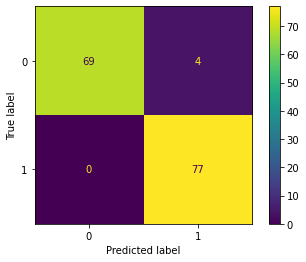

In [10]:
# confusion matrix
plot_confusion_matrix(clf, x_train, y_train);

In [11]:
clf.classes_

array([0, 1])

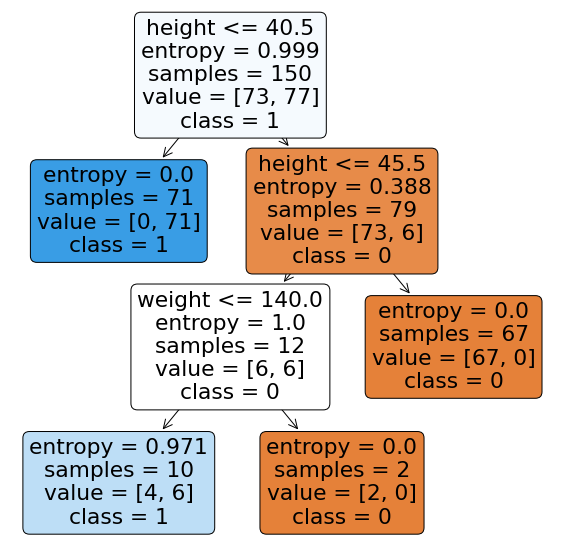

In [12]:
# Plot the tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    clf, 
    filled=True,
    rounded=True,
    feature_names=['height', 'weight'], # columns in same order as was trained on
    class_names=[str(x) for x in clf.classes_] # use cl2.classes_ to find class order
);

### gini

In [13]:
# Set max depth to 3 to make plotting the tree more visible
clf_GI = DecisionTreeClassifier( max_depth=3).fit(x_train, y_train)

In [14]:
# predict 
y_pred = clf_GI.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 0]


In [15]:
def calc_dt(y_true, y_predict):

    result_dict = {}
    
    acc = accuracy_score(y_true, y_predict)
    pre = precision_score(y_true, y_predict)
    rec = recall_score(y_true, y_predict)


    ls = [acc, pre, rec] # Appropriate for classification
    ls2 = ["Accuracy_Score", "Precision_Score", "Recall_Score"] # Appropriate for classification

    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
        
    return result_dict

# save results to object and print results

print("Baseline")
# baseline model (Majority Class) was 0
b_preds = [0 for x in range(len(y_test))]
bl = calc_dt(y_test, b_preds)

print("\nDecision Tree")
res1 = calc_dt(y_test, clf_GI.predict(x_test))


Baseline
Accuracy_Score: 0.54
Precision_Score: 0.0
Recall_Score: 0.0

Decision Tree
Accuracy_Score: 0.98
Precision_Score: 0.9583333333333334
Recall_Score: 1.0


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


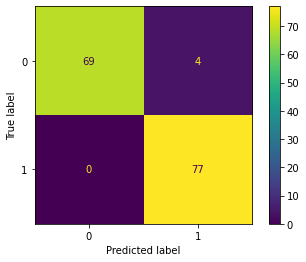

In [16]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf_GI, x_train, y_train);

In [17]:
clf_GI.classes_

array([0, 1])

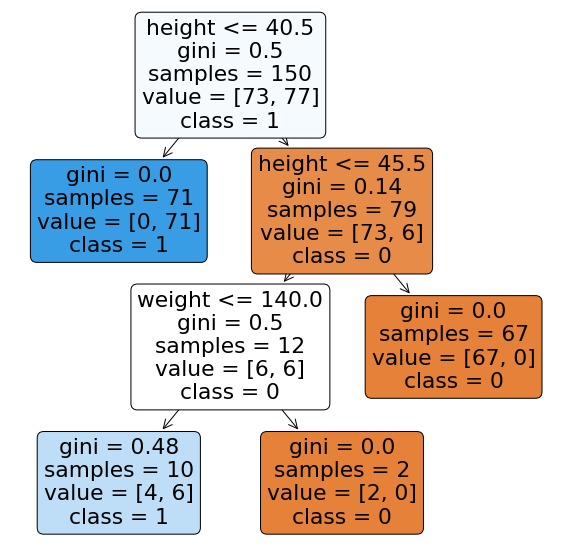

In [18]:
# Plot the tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    clf_GI, 
    filled=True,
    rounded=True,
    feature_names=['height', 'weight'], # columns in same order as was trained on
    class_names=[str(x) for x in clf.classes_] # use cl2.classes_ to find class order
);